# Redes Neuronales Artificiales
## Aplicación a datos de reconocimiento de actividad humana con smartphones

https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

### Librerías

In [3]:
install.packages('dplyr')
install.packages('tidyverse')
install.packages('tensorflow')
install.packages('tfestimators')
install.packages('keras')

ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


In [2]:
library(tidyverse)
library(tensorflow)
library(tfestimators)
library(keras)

ERROR: Error in library(tidyverse): there is no package called ‘tidyverse’


ERROR: Error in library(tensorflow): there is no package called ‘tensorflow’


ERROR: Error in library(tfestimators): there is no package called ‘tfestimators’


ERROR: Error in library(keras): there is no package called ‘keras’


### Datos de entrenamiento, validación y test

In [1]:
train_df <- read_csv('train.csv')

ERROR: Error in eval(expr, envir, enclos): could not find function "read_csv"


In [7]:
head(train_df)

tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0.2885845,-0.02029417,-0.1329051,-0.9952786,-0.9831106,-0.9135264,-0.9951121,-0.9831846,-0.9235270,-0.9347238,...,-0.7103041,-0.11275434,0.030400372,-0.4647614,-0.01844588,-0.8412468,0.1799406,-0.05862692,1,STANDING
0.2784188,-0.01641057,-0.1235202,-0.9982453,-0.9753002,-0.9603220,-0.9988072,-0.9749144,-0.9576862,-0.9430675,...,-0.8614993,0.05347695,-0.007434566,-0.7326262,0.70351059,-0.8447876,0.1802889,-0.05431672,1,STANDING
0.2796531,-0.01946716,-0.1134617,-0.9953796,-0.9671870,-0.9789440,-0.9965199,-0.9636684,-0.9774686,-0.9386916,...,-0.7601037,-0.11855926,0.177899480,0.1006992,0.80852908,-0.8489335,0.1806373,-0.04911782,1,STANDING
0.2791739,-0.02620065,-0.1232826,-0.9960915,-0.9834027,-0.9906751,-0.9970995,-0.9827498,-0.9893025,-0.9386916,...,-0.4828445,-0.03678797,-0.012892494,0.6400110,-0.48536645,-0.8486494,0.1819348,-0.04766318,1,STANDING
0.2766288,-0.01656965,-0.1153619,-0.9981386,-0.9808173,-0.9904816,-0.9983211,-0.9796719,-0.9904411,-0.9424691,...,-0.6992052,0.12332005,0.122541960,0.6935783,-0.61597061,-0.8478653,0.1851512,-0.04389225,1,STANDING
0.2771988,-0.01009785,-0.1051373,-0.9973350,-0.9904868,-0.9954200,-0.9976274,-0.9902177,-0.9955489,-0.9424691,...,-0.8446193,0.08263215,-0.143439010,0.2750408,-0.36822404,-0.8496316,0.1848225,-0.04212638,1,STANDING


In [8]:
head(variable.names(train_df))

[1] "tBodyAcc-mean()-X" "tBodyAcc-mean()-Y" "tBodyAcc-mean()-Z"
[4] "tBodyAcc-std()-X"  "tBodyAcc-std()-Y"  "tBodyAcc-std()-Z"

Las últimas dos columnas contienen el sujeto y la actividad que estaba realizando.

In [9]:
tail(variable.names(train_df))

[1] "angle(tBodyGyroJerkMean,gravityMean)"
[2] "angle(X,gravityMean)"                
[3] "angle(Y,gravityMean)"                
[4] "angle(Z,gravityMean)"                
[5] "subject"                             
[6] "Activity"

Chequeamos cuántas actividades distintas tenemos, esto es importante porque determina la cantidad de unidades que tenemos en la capa de salida de la RNA.

In [10]:
unique(train_df$Activity)

[1] "STANDING"           "SITTING"            "LAYING"            
[4] "WALKING"            "WALKING_DOWNSTAIRS" "WALKING_UPSTAIRS"

Los datos ya estaban separados en entrenamiento y test. Tenemos que subdividir los datos de entrenamiento en entrenamiento y validación. La asignación de las observaciones a submuestras se hace considerando el ID del sujeto.

In [11]:
length(unique(train_df$subject))

[1] 21

In [14]:
set.seed(123)
subject_cv <- sample(unique(train_df$subject), 9)

cv_df <- train_df %>%
filter(subject %in% subject_cv)

train_df <- train_df %>%
filter(subject %in% subject_cv == F)

In [15]:
length(unique(cv_df$subject))

[1] 9

In [16]:
length(unique(train_df$subject))

[1] 12

In [18]:
test_df <- read_csv('test.csv')

Warning message:
"Duplicated column names deduplicated: 'fBodyAcc-bandsEnergy()-1,8' => 'fBodyAcc-bandsEnergy()-1,8_1' [317], 'fBodyAcc-bandsEnergy()-9,16' => 'fBodyAcc-bandsEnergy()-9,16_1' [318], 'fBodyAcc-bandsEnergy()-17,24' => 'fBodyAcc-bandsEnergy()-17,24_1' [319], 'fBodyAcc-bandsEnergy()-25,32' => 'fBodyAcc-bandsEnergy()-25,32_1' [320], 'fBodyAcc-bandsEnergy()-33,40' => 'fBodyAcc-bandsEnergy()-33,40_1' [321], 'fBodyAcc-bandsEnergy()-41,48' => 'fBodyAcc-bandsEnergy()-41,48_1' [322], 'fBodyAcc-bandsEnergy()-49,56' => 'fBodyAcc-bandsEnergy()-49,56_1' [323], 'fBodyAcc-bandsEnergy()-57,64' => 'fBodyAcc-bandsEnergy()-57,64_1' [324], 'fBodyAcc-bandsEnergy()-1,16' => 'fBodyAcc-bandsEnergy()-1,16_1' [325], 'fBodyAcc-bandsEnergy()-17,32' => 'fBodyAcc-bandsEnergy()-17,32_1' [326], 'fBodyAcc-bandsEnergy()-33,48' => 'fBodyAcc-bandsEnergy()-33,48_1' [327], 'fBodyAcc-bandsEnergy()-49,64' => 'fBodyAcc-bandsEnergy()-49,64_1' [328], 'fBodyAcc-bandsEnergy()-1,24' => 'fBodyAcc-bandsEnergy()-1,24_1'

###  Variables objetivo / explicativas

Las funciones que utilizaremos requieren que los datos no estén en forma de data frame, sino como matriz. Para cada set de datos (entrenamiento, validación y test) vamos a armar por un lado una matriz con los valores observados de las variables explicativas y por otro, otra matriz con variables dummies correspondientes a las categorías de actividad, que es nuestra variable objetivo.

In [19]:
x_train <- train_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [20]:
y_train <- train_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

In [21]:
x_cv <- cv_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [22]:
y_cv <- cv_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

In [23]:
x_test <- test_df %>%
select(-subject, -Activity) %>%
as.matrix()

In [24]:
y_test <- test_df %>%
mutate(T1 = ifelse(Activity == "STANDING", 1, 0),
T2 = ifelse(Activity == "SITTING", 1, 0),
T3 = ifelse(Activity == "LAYING", 1, 0),
T4 = ifelse(Activity == "WALKING", 1, 0),
T5 = ifelse(Activity == "WALKING_DOWNSTAIRS", 1, 0),
T6 = ifelse(Activity == "WALKING_UPSTAIRS", 1, 0)) %>%
select(T1:T6) %>%
as.matrix()

### Uso de tensorflow

In [25]:
sess = tf$Session()
use_session_with_seed(123)

Set session seed to 123 (disabled GPU, CPU parallelism)


A la cantidad de unidades en la capa de entrada ya la conocemos, habíamos dicho que eran 561.

In [40]:
#Cant. unidades de entrada:
unit_count <- ncol(x_train)
unit_count

[1] 561

#### ¿Cuántas unidades debería tener la capa oculta?

Como hablamos anteriormente, podríamos pensar que tendría que haber un número óptimo de unidades en la capa oculta. Este hiperparámetro, llamémoslo *M*, se determinará en función al análisis del error que haremos a continuación.

Vamos a estimar el error aparente que tendría la RNA si *M* fuese 100, 500, 1000 o 5000. Para eso planteamos un proceso en el que, para cada valor de *M* que queremos probar, usaremos los datos de entrenamiento para estimar los parámetros de la red y luego los datos de validación para observar el error sobre un conjunto que no haya sido utilizado en la etapa de estimación. Esperamos que esto nos de una idea de qué valor de *M* podría resultar apropiado.

In [32]:
M <- c(100, 500, 1000, 5000)

M_Unid <- c()
Muestra <- c()
Err_aparente <- c()
Iteracion <- c()
Acc_train <- c()
Acc_cv <- c()

In [33]:
prev_time <- Sys.time()

for (i in 1:length(M)) {
  
  for (j in 1:30) {
    
    rna1 <- keras_model_sequential() 
    rna1 %>% 
      layer_dense(units = M[i], 
                  activation = 'relu',
                  input_shape = c(unit_count)) %>% 
      layer_dense(units = 6, 
                  activation = 'softmax')
    
    rna1 %>% compile(
      loss = 'categorical_crossentropy',
      optimizer = optimizer_sgd(lr = 0.01),
      metrics = c('categorical_accuracy')
    )
    
    history1 <- rna1 %>% 
      fit(x = x_train, 
          y = y_train,
          epochs = 5,
          validation_data = list(x_cv,y_cv))
    
    
    
    Iteracion <- c(Iteracion, replicate(2,j))
    
    M_Unid <- c(M_Unid, replicate(2,M[i]))
    
    Muestra <- c(Muestra,
                 "Entrenamiento",
                 "Validación")
    
    Acc_train <- rna1 %>% evaluate(x_train, y_train)
    
    Acc_cv <- rna1 %>% evaluate(x_cv, y_cv)
    
    Err_aparente <- c(Err_aparente,
                      1-Acc_train$categorical_accuracy,
                      1-Acc_cv$categorical_accuracy)
    
  }
}

pos_time <- Sys.time()

In [34]:
# En mi máquina esto tardó:
pos_time - prev_time

Time difference of 32.77547 mins

In [35]:
selec_M <- data.frame(M_Unid, Muestra, Err_aparente)

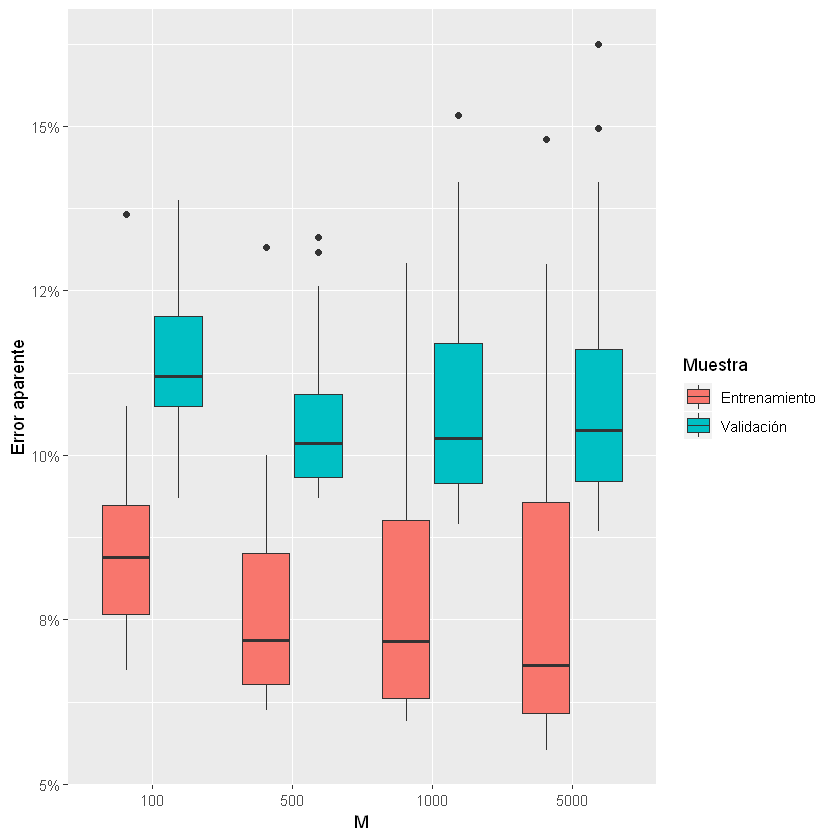

In [39]:
ggplot(data = selec_M,
       aes(x = factor(M_Unid),
           y = Err_aparente,
           fill = Muestra)) +
geom_boxplot() +
scale_y_continuous(labels = scales::percent_format(1)) + 
labs(x = "M",
     y = "Error aparente")

#### Otra estrategia

Otra manera de proceder sería eligiendo un valor de *M* grande (grande sería al menos mayor que la cantidad de unidades en la capa de entrada) y, en la función de costo que utilizamos para la estimación de los parámetros, introducir un parámetro de penalización que fuerce a aquellos parámetros que no tengan mucho sustento en los datos a tener un peso bajo.

Para hacer esto, podemos plantear algunos valores del parámetro de penalización y proceder de la misma manera que cuando probamos distintos valores de *M*, solamente que ahora tendríamos que fijar *M* en un valor "grande" y hacer variar la penalización, a la que llamaremos $\lambda$ (en el código está como lambda).

In [37]:
lambda <- c(0, 0.01, 0.1, 1, 10)

Reg_param <- c()
Muestra <- c()
Err_aparente <- c()
Iteracion <- c()
Acc_train <- c()
Acc_cv <- c()

In [41]:
prev_time2 <- Sys.time()

for (i in 1:length(lambda)) {
  
  for (j in 1:30) {
    
    rna1 <- keras_model_sequential() 
    rna1 %>% 
      layer_dense(units = 1000, 
                  activation = 'relu', 
                  kernel_regularizer = regularizer_l2(lambda[i]),
                  input_shape = c(unit_count)) %>% 
      layer_dense(units = 6, 
                  activation = 'softmax')
    
    rna1 %>% compile(
      loss = 'categorical_crossentropy',
      optimizer = optimizer_sgd(lr = 0.01),
      metrics = c('categorical_accuracy')
    )
    
    history1 <- rna1 %>% 
      fit(x = x_train, 
          y = y_train,
          epochs = 5,
          validation_data = list(x_cv,y_cv))
    
    
    
    Iteracion <- c(Iteracion, replicate(2,j))
    
    Reg_param <- c(Reg_param, replicate(2,lambda[i]))
    
    Muestra <- c(Muestra,
                 "Entrenamiento",
                 "Validación")
    
    Acc_train <- rna1 %>% evaluate(x_train, y_train)
    
    Acc_cv <- rna1 %>% evaluate(x_cv, y_cv)
    
    Err_aparente <- c(Err_aparente,
                      1-Acc_train$categorical_accuracy,
                      1-Acc_cv$categorical_accuracy)
    
  }
}

pos_time2 <- Sys.time()

In [42]:
# en mi máquina esto tardó:
pos_time2 - prev_time2

Time difference of 1.080293 hours

In [43]:
selec_lambda <- data.frame(Reg_param, Muestra, Err_aparente)

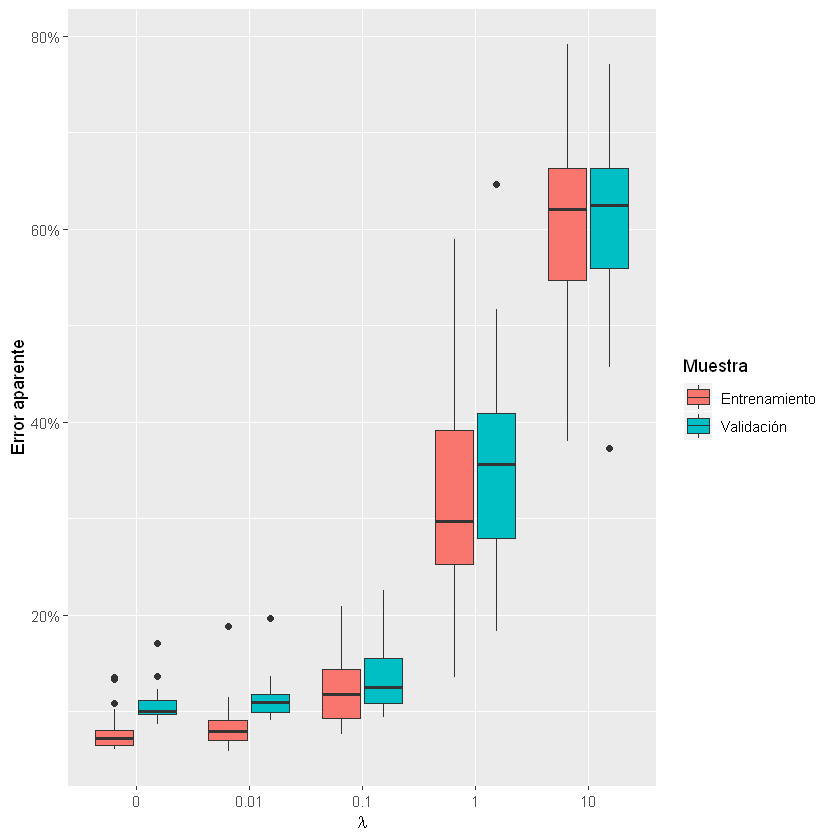

In [44]:
ggplot(data = selec_lambda,
       aes(x = factor(Reg_param),
           y = Err_aparente, 
           fill = Muestra)) +
geom_boxplot() +
scale_y_continuous(labels = scales::percent_format(1)) +
labs(x = expression(lambda),
     y = "Error aparente")

### Diseño seleccionado

In [45]:
set.seed(123)

rna1 <- keras_model_sequential() 
rna1 %>% 
  layer_dense(units = 500, 
              activation = 'relu', 
              input_shape = c(unit_count)) %>% 
  layer_dense(units = 6, 
              activation = 'softmax')

rna1 %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_sgd(lr = 0.01),
  metrics = c('categorical_accuracy')
)

history1 <- rna1 %>% 
  fit(x = x_train, 
      y = y_train,
      validation_data = list(x_cv,y_cv))

In [46]:
# Precisión en la muestra de entrenamiento
rna1 %>% evaluate(x_train, y_train)

$loss
[1] 0.1573668

$categorical_accuracy
[1] 0.9633496

In [47]:
# Precisión en la muestra de cross-validation
rna1 %>% evaluate(x_cv, y_cv)

$loss
[1] 0.2474524

$categorical_accuracy
[1] 0.920092

In [48]:
# Precisión en la muestra de test
rna1 %>% evaluate(x_test, y_test)

$loss
[1] 0.2436414

$categorical_accuracy
[1] 0.9270445